In [11]:
! pip install numpy
! pip install pandas

'pip' is not recognized as an internal or external command,
operable program or batch file.


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
#if kaggle
#
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# if local
dirname = 'data/'
filename = 'dataset_link_phishing.csv'
# You can wrivte up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Lab_1 - Dane wejściowe, przeglądanie, oczyszczanie

## Import danych z różnych źródeł

In [14]:
#if kaggle
#df = pd.read_csv(os.path.join(dirname, filename), low_memory=False) # dirname, filename to zmienne powyrzej zdefiniowane jako ścieżka do datasetu podpiętego do tego dokumentu 
# df = pd.read_excel('ścieżka_do_pliku.xlsx')
# df = pd.read_parquet('ścieżka_do_pliku.parquet')

#if local
df = pd.read_csv(dirname + filename, low_memory=False) # dirname, filename to zmienne powyrzej zdefiniowane jako ścieżka do datasetu podpiętego do tego dokumentu 


## Wstęne przeglądanie danych

Pierwsze pięć wierszy

In [15]:
print(df.head())

NameError: name 'df' is not defined

df.info() - dla każdej z kolumn podaje: nazwę, ilość pustych wierszy tej kolumny, ilość wypełnionych wierszy oraz typ zmiennej w kolumnie

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nr                          19431 non-null  int64  
 1   url                         19431 non-null  object 
 2   url_length                  19431 non-null  int64  
 3   hostname_length             19431 non-null  int64  
 4   ip                          19431 non-null  int64  
 5   total_of.                   19431 non-null  int64  
 6   total_of-                   19431 non-null  int64  
 7   total_of@                   19431 non-null  int64  
 8   total_of?                   19431 non-null  int64  
 9   total_of&                   19431 non-null  int64  
 10  total_of=                   19431 non-null  int64  
 11  total_of_                   19431 non-null  int64  
 12  total_of~                   19431 non-null  int64  
 13  total_of%                   194

df.describe()
Określa statystyczne właściwości danych w kolumnach, podobnie jak df.head() na przykładzie kilku kolumn z początku, środka i końca dokumentu

In [ ]:
print(df.describe())

                 nr    url_length  hostname_length            ip  \
count  19431.000000  19431.000000     19431.000000  19431.000000   
mean    5008.529412     61.134527        21.101127      0.649529   
std     3051.763518     56.205292        10.719241      0.477130   
min        0.000000     12.000000         4.000000      0.000000   
25%     2428.500000     33.000000        15.000000      0.000000   
50%     4857.000000     47.000000        19.000000      1.000000   
75%     7286.000000     71.000000        24.000000      1.000000   
max    11429.000000   1641.000000       214.000000      1.000000   

          total_of.     total_of-     total_of@     total_of?     total_of&  \
count  19431.000000  19431.000000  19431.000000  19431.000000  19431.000000   
mean       2.485564      0.997684      0.021872      0.141012      0.164994   
std        1.383635      2.076148      0.155149      0.364934      0.842362   
min        1.000000      0.000000      0.000000      0.000000      0.00

## Przygotowanie danych
Jeśli dane są niepełne trzeba je uzupełnić, w pierewszej kolejności funkcja która określi ile jest pustych rekordów

In [ ]:
print(df.isnull().sum())

nr                 0
url                0
url_length         0
hostname_length    0
ip                 0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 87, dtype: int64


wniosek: wszystkie wylistowane kolumny są pełne

.unique() - wypisuje bez powtórzeń wszystkie wartości które pojawiają się w kolumnie.

In [ ]:
print("IP unique values in array",df['ip'].unique())
print("google_index unique values in array",df['google_index'].unique())
print("Status unique values in array",df['status'].unique())

IP unique values in array [0 1]
google_index unique values in array [0 1]
Status unique values in array ['phishing' 'legitimate']


Filtrowanie na podstawie wartości kolumny

In [ ]:
#filtruje tylko te wiersze w których w kolumnie 'status' jest 'phishing'
df[df['status'].isin(['phishing'])]

,nr,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
5,5,https://support-appleld.com.secureupdate.duila...,128,50,1,4,1,0,1,2,...,1,one,0,25,3993,5707171,0,1,0,phishing
6,6,https://www.authpro.com/auth/ubabankng/?action...,50,15,0,2,0,0,1,0,...,1,zero,0,705,7330,154708,0,0,4,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19419,11418,http://www.heinzreber.net/homeflash1.html,41,18,1,3,0,0,0,0,...,1,0,0,977,5596,0,0,1,0,phishing
19422,11421,http://www.peoplemakingplaces.com/includes/Sup...,117,26,1,2,1,0,0,0,...,1,0,0,134,2058,0,0,1,2,phishing
19424,11423,http://www.dmega.co.kr/dmega/data/qna/sec/page...,85,15,1,4,0,0,1,0,...,0,1,0,293,5186,10408014,0,1,1,phishing
19427,11426,http://www.budgetbots.com/server.php/Server%20...,84,18,1,5,0,1,1,0,...,1,0,0,211,6728,0,0,1,0,phishing


In [ ]:
df_phishing = df[df['status'].isin(['legitimate'])]
df_legit = df[df['status'].isin(['phishing'])]

# Lab_2 Wizualizacja

## Matplotlib

Import blibliotek matplotlib

In [ ]:
! pip install matplotlib

You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl

Do tworzenia osi najprościej wykorzystać funckję subplots, zwraca ona fig - czyli wykres oraz jego ax - dane wszystkich osi tego wykresu (Plota)

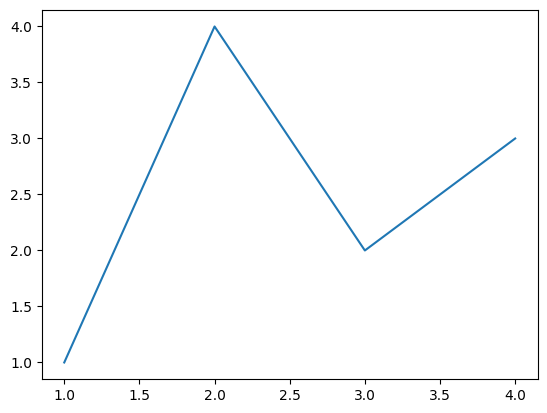

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
plt.show()

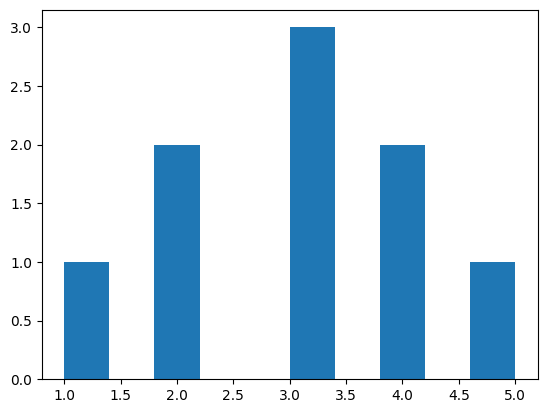

In [ ]:
fig, axs = plt.subplots()  # a figure with a single Axes
null = axs.hist([1,2,2,3,3,3,4,4,5]) # test with data


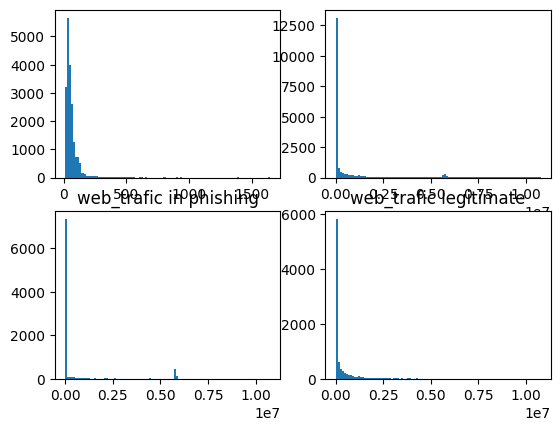

In [ ]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
null = axs[0][0].hist(df['url_length'], bins=100)
null = axs[0][1].hist(df['web_traffic'], bins=100)
null = axs[1][0].hist(df[df['status'].isin(['phishing'])]['web_traffic'], bins=100)
null = axs[1][0].set_title('web_trafic in phishing')
null = axs[1][1].hist(df[df['status'].isin(['legitimate'])]['web_traffic'], bins=100)
null = axs[1][1].set_title('web_trafic legitimate')


Problem nakładających się nazw.. napewno jest sposób na czyszczenie tego ale może innym razem

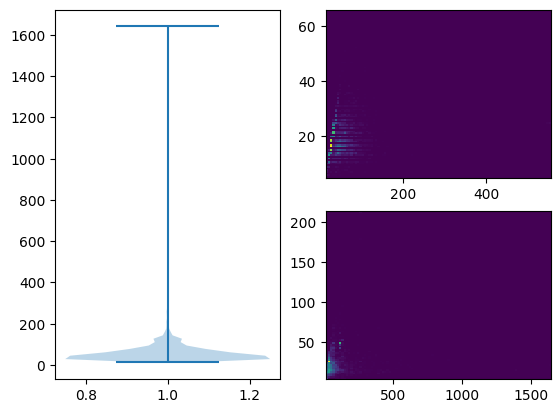

In [ ]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['violin', 'right_top'],
                               ['violin', 'right_bottom']])
null = axs['right_top'].hist2d(df[df['status'].isin(['legitimate'])]['url_length'],df[df['status'].isin(['legitimate'])]['hostname_length'], bins=100)
null = axs['right_bottom'].hist2d(df[df['status'].isin(['phishing'])]['url_length'],df[df['status'].isin(['phishing'])]['hostname_length'], bins=100)
null = axs['violin'].violinplot(df['url_length'],)

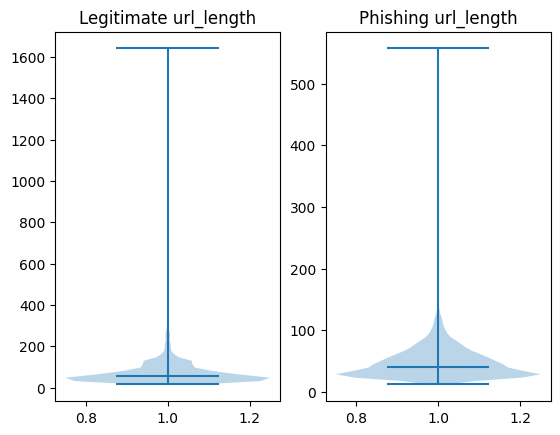

In [ ]:
def compare_with_violin(feature_name):
    fig,axs = plt.subplots(1,2)

    axs[0].violinplot(df_legit[feature_name],showmeans=False,showmedians=True)
    axs[0].set_title("Legitimate "+feature_name)
    axs[1].violinplot(df_phishing[feature_name],showmeans=False,showmedians=True)
    axs[1].set_title("Phishing "+feature_name)

compare_with_violin('url_length')

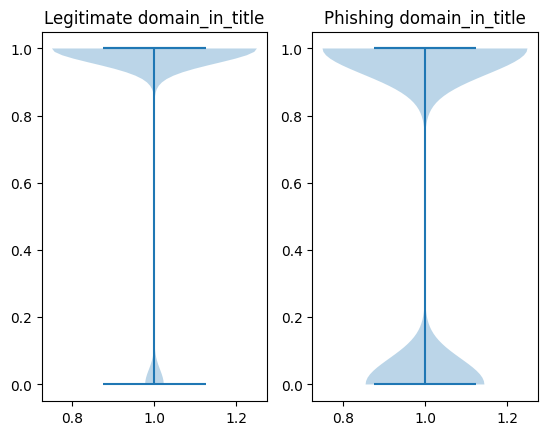

In [ ]:
compare_with_violin('domain_in_title')

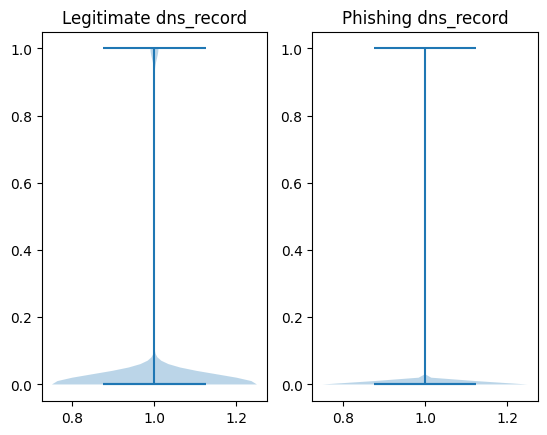

In [ ]:
compare_with_violin('dns_record')

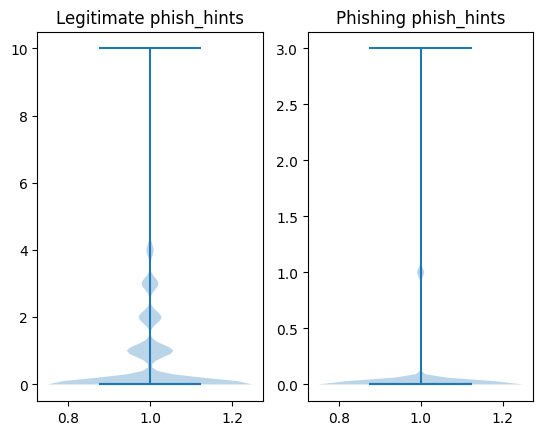

In [ ]:
compare_with_violin('phish_hints')

## Plotly

In [ ]:
!pip install plotly
!pip install ipykernel
!pip install nbformat

You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


Wykres słupkowy

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

Histogram

In [ ]:
fig = px.density_heatmap(df_legit, x="hostname_length", y="url_length")
fig.show()

Wykres Liniowy 

In [ ]:
fig = px.line(x=[1,2,4,5,3,6],y=[1,2,3,4,5,6], title='Life expectancy in Canada')
fig.show()

# Lab_3 Feature reduction, models

## Przegląd wykresów zestawiających dwa wymiary

In [ ]:

!pip install scikit-learn

! pip install scipy
import plotly.express as px
from scipy import stats

You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Sync\pwr\2024_I\StatystycznaAnalizaDanych\L\notebook\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
features = ["url_length", "hostname_length", "web_traffic",'safe_anchor']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color=df['status']
)
fig.update_traces()
fig.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA

X = df[["url_length", "hostname_length", "web_traffic",'safe_anchor']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['status'])
fig.show()

In [ ]:
pca.explained_variance_ratio_

array([9.99999999e-01, 7.88367625e-10])

## T-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# pod uwagę wezmę tylko dane liczbowe
df_dtype_int64 = df.select_dtypes(include='int64')

In [ ]:

# dla ułatwienia wezmę na pozcątku dwa wymiary 
df_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(df[['hostname_length','url_length']][:500])
df_tsne = pd.DataFrame({'hostname_length': df_embedded.T[0],'url_length': df_embedded.T[1]})
fig = px.scatter(df,x="hostname_length", y="url_length", color=df['status'],hover_data=['nr'])
fig.show()
df_fromTSNE = pd.DataFrame({'x':df_embedded.T[0], 'y':df_embedded.T[1],'status':df['status'][:500]})
fig = px.scatter(df_fromTSNE ,x='x', y='y', color='status' )
fig.show()

In [ ]:

# teraz kilka wymiarów na 2
df_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(df[['hostname_length','url_length','phish_hints']])
df_fromTSNE = pd.DataFrame({'x':df_embedded.T[0], 'y':df_embedded.T[1],'status':df['status']})
fig = px.scatter(df_fromTSNE ,x='x', y='y', color='status' )
fig.show()


In [ ]:
! pip show nbformat

Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License
        
        - Copyright (c) 2001-2015, IPython Development Team
        - Copyright (c) 2015-, Jupyter Development Team
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        1. Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
 